# Data Workflow Lab 2

Proceed with your analysis of the Project 3 data set. You may need to compute new columns as you proceed. Fit one or more linear models to the data, investigate model fits and outliers, use regularization when appropriate.

### Learning objectives
- Perform exploratory analysis
- Generate correlation matrix of the features
- Generate linear regression models
- Evaluate model fit

If appropriate for your models and featuers:
- Use [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) to pick the best features
- Try different regularization options

In [1]:
% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# Load the data from the previous lab
# If you changed the name you'll need to edit the next line

sales = pd.read_csv("/Users/Rebecca/DSI-projects/projects/project-03/Iowa_Liquor_sales_sample_10pct.csv")

# Convert dates


In [3]:
sales.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [5]:
len(sales)

270955

In [6]:
#sales['Category Name'].value_counts()

In [7]:
len(sales['Category Name'].unique())

72

In [8]:
#sales['Category'].value_counts()

In [9]:
len(sales['Category'].unique())

84

In [10]:
#sales['Bottle Volume (ml)'] = sales['Bottle Volume (ml)'].apply(lambda x: float(x)/1000)

In [11]:
## Put these deleted ones in a diff df?  Make dictionaries?
del sales['City']
del sales['County Number']
del sales['Category']
del sales['Volume Sold (Gallons)']
del sales['Item Description']
del sales['Category Name']
del sales['County']

sales.rename(columns={'Bottle Volume (ml)':'volume'}, inplace=True)
sales.rename(columns={'Store Number':'storeID'}, inplace=True)
sales.rename(columns={'Date':'date'}, inplace=True)
sales.rename(columns={'Item Number':'itemID'}, inplace=True)
sales.rename(columns={'Zip Code':'zip'}, inplace=True)
sales.rename(columns={'State Bottle Cost':'cost'}, inplace=True)
sales.rename(columns={'State Bottle Retail':'retail'}, inplace=True)
sales.rename(columns={'Vendor Number':'vendorID'}, inplace=True)
sales.rename(columns={'Bottles Sold':'bottles_sold'}, inplace=True)
sales.rename(columns={'Sale (Dollars)':'dollars_sold'}, inplace=True)
sales.rename(columns={'Volume Sold (Liters)':'volume_sold'}, inplace=True)
#sales.head()

In [12]:
sales.head()

,date,storeID,zip,vendorID,itemID,volume,cost,retail,bottles_sold,dollars_sold,volume_sold
0,2015-11-04,3717,50674,55,54436,750,$4.50,$6.75,12,$81.00,9.0
1,2016-03-02,2614,52807,395,27605,750,$13.75,$20.63,2,$41.26,1.5
2,2016-02-11,2106,50613,65,19067,1000,$12.59,$18.89,24,$453.36,24.0
3,2016-02-03,2501,50010,395,59154,1750,$9.50,$14.25,6,$85.50,10.5
4,2015-08-18,3654,50421,297,35918,1750,$7.20,$10.80,12,$129.60,21.0


In [13]:
sales['volume'].unique()

array([ 750, 1000, 1750,  200,  300,  500,  375, 3000, 2400,  600,  100,
       1200,  800, 4800,  150, 2250, 1500,  400, 3600,   50,  850,  950,
        603, 2550, 6000, 1125, 4500,  900,  250])

In [14]:
sales['volume'].value_counts()

750     122807
1750     54369
1000     36824
375      27096
500      11986
200       9951
600       3282
3000      1605
300       1338
100        865
800        318
1200       254
2400       103
400         29
850         24
4800        17
50          14
3600        13
6000        11
603         10
150          6
2550         6
950          6
2250         6
1500         6
1125         5
900          2
4500         1
250          1
Name: volume, dtype: int64

In [15]:
sales['volume'] = sales['volume'].apply(lambda x: str(x))

In [16]:
sales['volume'] = sales['volume'].apply(lambda x: x.replace('0.603', '0.600'))
sales['volume'] = sales['volume'].apply(lambda x: x.replace('0.502', '0.500'))

In [17]:
sales['volume'] = sales['volume'].apply(lambda x: float(x))

In [18]:
sales['volume'].value_counts()

750.0     122807
1750.0     54369
1000.0     36824
375.0      27096
500.0      11986
200.0       9951
600.0       3282
3000.0      1605
300.0       1338
100.0        865
800.0        318
1200.0       254
2400.0       103
400.0         29
850.0         24
4800.0        17
50.0          14
3600.0        13
6000.0        11
603.0         10
950.0          6
1500.0         6
2250.0         6
2550.0         6
150.0          6
1125.0         5
900.0          2
250.0          1
4500.0         1
Name: volume, dtype: int64

In [23]:
#sales = sales[sales.volume != 180.000]
#sales = sales[sales.volume != 0.000]
#sales = sales[sales.volume != 189.000]
#sales = sales[sales.volume != 225.000]

In [24]:
#sales.sort_values('volume')

In [24]:
volumes = sales['volume'].unique()
volumes

array([  750.,  1000.,  1750.,   200.,   300.,   500.,   375.,  3000.,
        2400.,   600.,   100.,  1200.,   800.,  4800.,   150.,  2250.,
        1500.,   400.,  3600.,    50.,   850.,   950.,   603.,  2550.,
        6000.,  1125.,  4500.,   900.,   250.])

In [27]:
zeros = [0] * 28

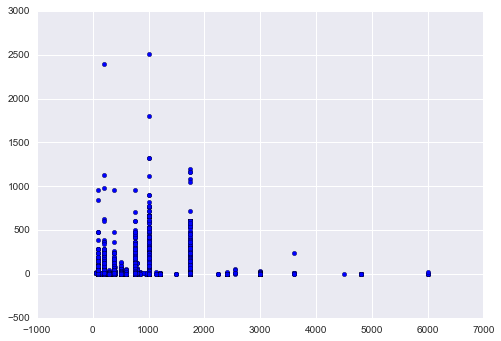

In [28]:
df_vol = pd.DataFrame(volumes)
plt.scatter(sales['volume'], sales['bottles_sold'])
#plt.xlim([-0.1,6.1])
#plt.ylim([-0.1,0.1])

In [29]:
df_sales = sales[sales['volume'] > 2]
df_sales['volume'].value_counts()

3.00    1605
2.40     103
4.80      17
3.60      13
6.00      11
2.55       6
2.25       6
4.50       1
Name: volume, dtype: int64

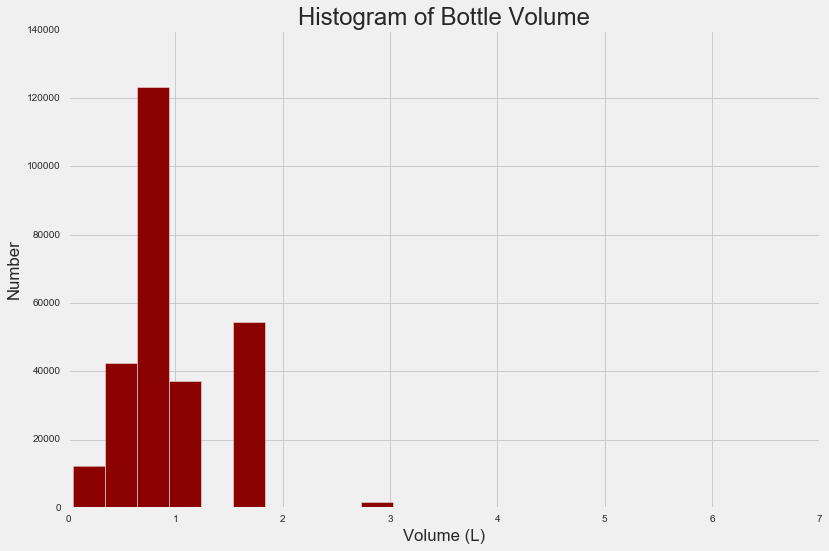

In [34]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.hist(sales['volume'], color = 'darkred', bins = 20)

plt.title('Histogram of Bottle Volume', fontsize = 24)

# y label
plt.ylabel('Number')

# x label
plt.xlabel('Volume (L)')

plt.show()

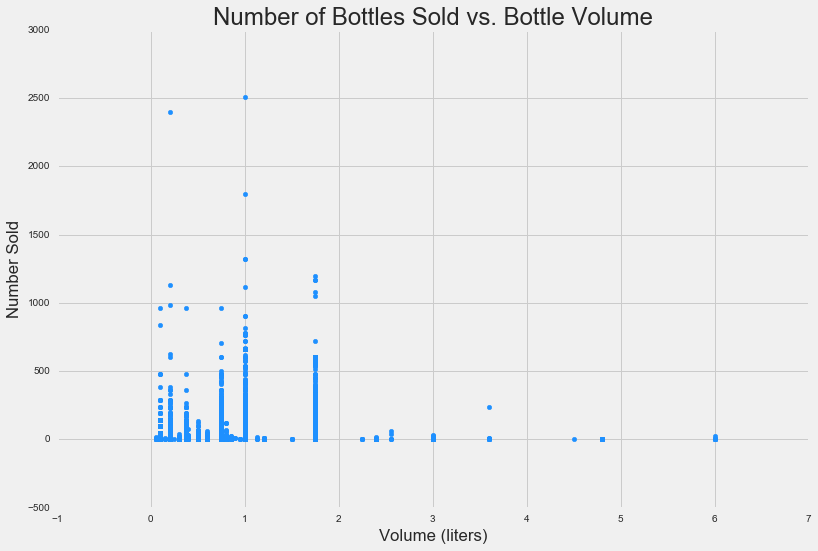

In [38]:
## Plot a histogram of peak chart position 
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

vol_hist = plt.scatter(sales['volume'], sales['bottles_sold'], color = 'dodgerblue')

plt.title('Number of Bottles Sold vs. Bottle Volume', fontsize = 24)

# y label
plt.ylabel('Number Sold')

# x label
plt.xlabel('Volume (liters)')

#plt.xlim([0, 6.1])
#plt.ylim([0, 140])

plt.show()

In [40]:
## Change dollar-value columns to floats
sales['cost'] = sales['cost'].apply(lambda x: float(x.replace('$', '')))
sales['retail'] = sales['retail'].apply(lambda x: float(x.replace('$', '')))
sales['dollars_sold'] = sales['dollars_sold'].apply(lambda x: float(x.replace('$', '')))

In [41]:
sales.head()

,date,store,Zip Code,county,Category Name,vendorID,Item Number,Item Description,volume,cost,retail,number_sold,dollars_sold,volume_sold
0,2016-03-31,5029,52806,Scott,TEQUILA,370,87152,Avion Silver,0.0,9.99,14.99,12,179.88,4.5
1,2016-03-31,5029,52806,Scott,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1.0,12.50,18.75,2,37.50,2.0
2,2016-03-31,4959,50613,Black Hawk,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1.0,5.97,8.96,6,53.76,10.5
3,2016-03-31,2190,50314,Polk,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,0.0,2.24,3.36,48,161.28,9.6
4,2016-03-31,5240,52358,NaN,CREAM LIQUEURS,305,73055,Rumchata,0.0,12.50,18.75,6,112.50,4.5


In [43]:
sales['markup'] = [sales['retail'][i] - sales['cost'][i] for i in range(len(sales))]

In [45]:
sales['total_profit'] = [sales['markup'][i]*sales['number_sold'][i] for i in range(len(sales))]

In [46]:
sales.head()

,date,store,Zip Code,county,Category Name,vendorID,Item Number,Item Description,volume,cost,retail,number_sold,dollars_sold,volume_sold,markup,total_profit
0,2016-03-31,5029,52806,Scott,TEQUILA,370,87152,Avion Silver,0.0,9.99,14.99,12,179.88,4.5,5.00,60.00
1,2016-03-31,5029,52806,Scott,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1.0,12.50,18.75,2,37.50,2.0,6.25,12.50
2,2016-03-31,4959,50613,Black Hawk,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1.0,5.97,8.96,6,53.76,10.5,2.99,17.94
3,2016-03-31,2190,50314,Polk,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,0.0,2.24,3.36,48,161.28,9.6,1.12,53.76
4,2016-03-31,5240,52358,NaN,CREAM LIQUEURS,305,73055,Rumchata,0.0,12.50,18.75,6,112.50,4.5,6.25,37.50


## Exploratory Analysis
Make some plots, look at correlations, etc.

In [ ]:
# Compute correlations


In [ ]:
# Perform some exploratory analysis, make a few plots

In [ ]:
# Fit a linear model

# Plot the data and the best fit line

# Compute the model fit


In [ ]:
# Predict Total 2016 sales, compare to 2015


In [ ]:
# Try per zip code or city to get better resolution



In [ ]:
# Filter out stores that opened or closed throughout the year
# If this wasn't done already


In [ ]:
# Fit another model

# Compute the model fit


In [ ]:
# Predict Total 2016 sales, compare to 2015
